In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 
              'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 
              'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 
              'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    # assume that degree >= 1
    # initialize the dataframe:
    poly_dataframe = pd.DataFrame()
    # and set poly_dataframe['power_1'] equal to the passed feature
    poly_dataframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_dataframe[name] to be feature^power; use apply(*)
            poly_dataframe[name] = feature.apply(lambda x: x**power)
    return poly_dataframe

In [4]:
sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict, parse_dates=['date'])
sales = sales.sort_values(['sqft_living','price']).reset_index(drop=True)
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3980300371,2014-09-26,142000.0,0.0,0.00,290.0,20875,1,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620.0,22850.0
1,2856101479,2014-07-01,276000.0,1.0,0.75,370.0,1801,1,0,0,...,5,370,0,1923,0,98117,47.6778,-122.389,1340.0,5000.0
2,1723049033,2014-06-20,245000.0,1.0,0.75,380.0,15000,1,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170.0,15000.0
3,1222029077,2014-10-29,265000.0,0.0,0.75,384.0,213444,1,0,0,...,4,384,0,2003,0,98070,47.4177,-122.491,1920.0,224341.0
4,6896300380,2014-10-02,228000.0,0.0,1.00,390.0,5900,1,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170.0,6000.0


In [6]:
from sklearn import linear_model
l2_small_penalty = 1.5e-5
poly15_data = polynomial_dataframe(sales['sqft_living'], 15)
model = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
model.fit(poly15_data, sales['price'])

Ridge(alpha=1.5e-05, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [8]:
model.coef_

array([  1.24873306e+02,  -4.77376011e-02,   3.01446238e-05,
        -2.44419942e-09,  -1.94153675e-13,   8.54085686e-18,
         1.51142121e-21,   8.27979094e-26,   6.52603100e-31,
        -3.27895017e-34,  -3.87962315e-38,  -2.72437650e-42,
        -1.07790800e-46,   3.78242694e-51,   1.39790296e-54])

In [9]:
df_1 = pd.read_csv('wk3_kc_house_set_1_data.csv', dtype=dtype_dict, parse_dates=['date'])
df_2 = pd.read_csv('wk3_kc_house_set_2_data.csv', dtype=dtype_dict, parse_dates=['date'])
df_3 = pd.read_csv('wk3_kc_house_set_3_data.csv', dtype=dtype_dict, parse_dates=['date'])
df_4 = pd.read_csv('wk3_kc_house_set_4_data.csv', dtype=dtype_dict, parse_dates=['date'])

In [11]:
l2_small_penalty=1e-9
for df in [df_1, df_2, df_3, df_4]:
    poly_data = polynomial_dataframe(df['sqft_living'], 15)
    model = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
    model.fit(poly_data, df['price'])
    print(model.coef_)

[  5.44669390e+02  -3.55447596e-01   1.22446377e-04  -1.17175306e-08
  -3.90512491e-13  -1.39076430e-17   1.47860317e-20   6.87491797e-25
  -7.57204088e-29  -1.04097291e-32  -3.71844322e-37   3.39989425e-41
   5.56592036e-45   2.53761358e-49  -3.35152911e-53]
[  8.59362667e+02  -8.18118300e-01   4.28879996e-04  -9.12770690e-08
  -2.69604430e-12   3.73980329e-15  -1.42711929e-19  -6.30794700e-23
  -1.44559582e-27   7.44321382e-31   9.25865793e-35   3.28006663e-41
  -1.29543494e-42  -1.38781261e-46   1.66546444e-50]
[ -7.55395915e+02   9.75579473e-01  -4.58945958e-04   7.77957930e-08
   7.15013764e-12  -2.88602020e-15  -2.13678131e-20   3.38085254e-23
   2.19178219e-27  -1.97067811e-31  -4.15993182e-35  -1.80196180e-39
   3.19071188e-43   5.08456920e-47  -3.93304273e-51]
[  1.11944570e+03  -9.83760193e-01   3.38770885e-04   3.60377237e-08
  -4.37814013e-11   5.77191657e-15   7.66795260e-19  -9.49297595e-23
  -1.96030840e-26  -2.10879012e-32   3.31005056e-34   3.47733887e-38
  -2.43039258

In [12]:
l2_large_penalty=123.
for df in [df_1, df_2, df_3, df_4]:
    poly_data = polynomial_dataframe(df['sqft_living'], 15)
    model = linear_model.Ridge(alpha=l2_large_penalty, normalize=True)
    model.fit(poly_data, df['price'])
    print(model.coef_)

[  2.32806803e+00   3.53621608e-04   3.31969692e-08   2.00082477e-12
   1.11492559e-16   6.57786122e-21   4.12939525e-25   2.70393755e-29
   1.81614763e-33   1.23824277e-37   8.51872481e-42   5.89455598e-46
   4.09542560e-50   2.85464889e-54   1.99547476e-58]
[  2.09756903e+00   3.90817483e-04   6.67189944e-08   8.90002997e-12
   9.72639877e-16   9.69733682e-20   9.50564475e-24   9.44491031e-28
   9.57191338e-32   9.86945155e-36   1.03101115e-39   1.08729784e-43
   1.15453748e-47   1.23211305e-51   1.31986696e-55]
[  2.28906258e+00   4.12472190e-04   6.08835345e-08   6.58572163e-12
   6.15278155e-16   5.64446634e-20   5.28834396e-24   5.07091402e-28
   4.94657273e-32   4.88043809e-36   4.85009106e-40   4.84161534e-44
   4.84635021e-48   4.85883628e-52   4.87558469e-56]
[  2.08596194e+00   4.05035772e-04   7.46864647e-08   1.13096608e-11
   1.45864442e-15   1.73561251e-19   2.01609632e-23   2.34605255e-27
   2.75636073e-31   3.27043069e-35   3.91046855e-39   4.70118041e-43
   5.67212304

In [13]:
train_valid_shuffled = pd.read_csv('wk3_kc_house_train_valid_shuffled.csv', 
                                   dtype=dtype_dict, parse_dates=['date'])
test = pd.read_csv('wk3_kc_house_test_data.csv', dtype=dtype_dict, parse_dates=['date'])

In [86]:
def k_fold_cross_validation(k, l2_penalty, df, output):
    n = len(df)
    all_rss = []
    poly_data = polynomial_dataframe(df['sqft_living'], 15)
    for i in range(k):
        start = (n*i)//k
        end = (n*(i+1))//k - 1
        validation = poly_data[start:end+1]
        y_val = df[start:end+1][output]
        train = poly_data.iloc[0:start, :].append(poly_data.iloc[end+1:, :])
        y = (df.iloc[0:start, :].append(df.iloc[end+1:, :]))[output]
        model = linear_model.Ridge(alpha=l2_penalty, normalize=True)
        if (train.index != y.index).sum() > 0:
            print('train index mismatch!')
        if (validation.index != y_val.index).sum() > 0:
            print('validation index mismatch!')
        # fit the model
        model.fit(train, y)
        rss = np.sum(np.square(model.predict(validation) - y_val))
        all_rss.append(rss)
        
    return np.array(all_rss).mean()

In [87]:
all_l2 = np.logspace(1, 7, num=13)
all_avg_rss = []
for l2 in all_l2:
    avg_rss = k_fold_cross_validation(10, l2, train_valid_shuffled, 'price')
    all_avg_rss.append(avg_rss)

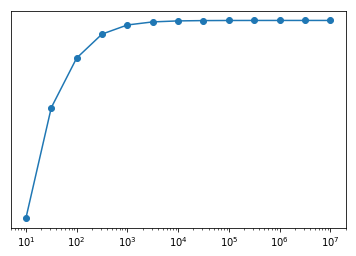

In [88]:
plt.figure()
plt.loglog(all_l2, all_avg_rss, 'o-')
plt.show()

In [89]:
best_l2 = all_l2[np.argmin(all_avg_rss)]
print('best L2: {:6.3e}'.format(best_l2))

poly_data = polynomial_dataframe(test['sqft_living'], 15)
final_model = linear_model.Ridge(alpha=100, normalize=True)
final_model.fit(poly_data, test['price'])

best L2: 1.000e+01


Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [75]:
print('{:6.3e}'.format(np.sum(np.square(final_model.predict(poly_data) - test['price']))))

2.719e+14
